## Problem 2
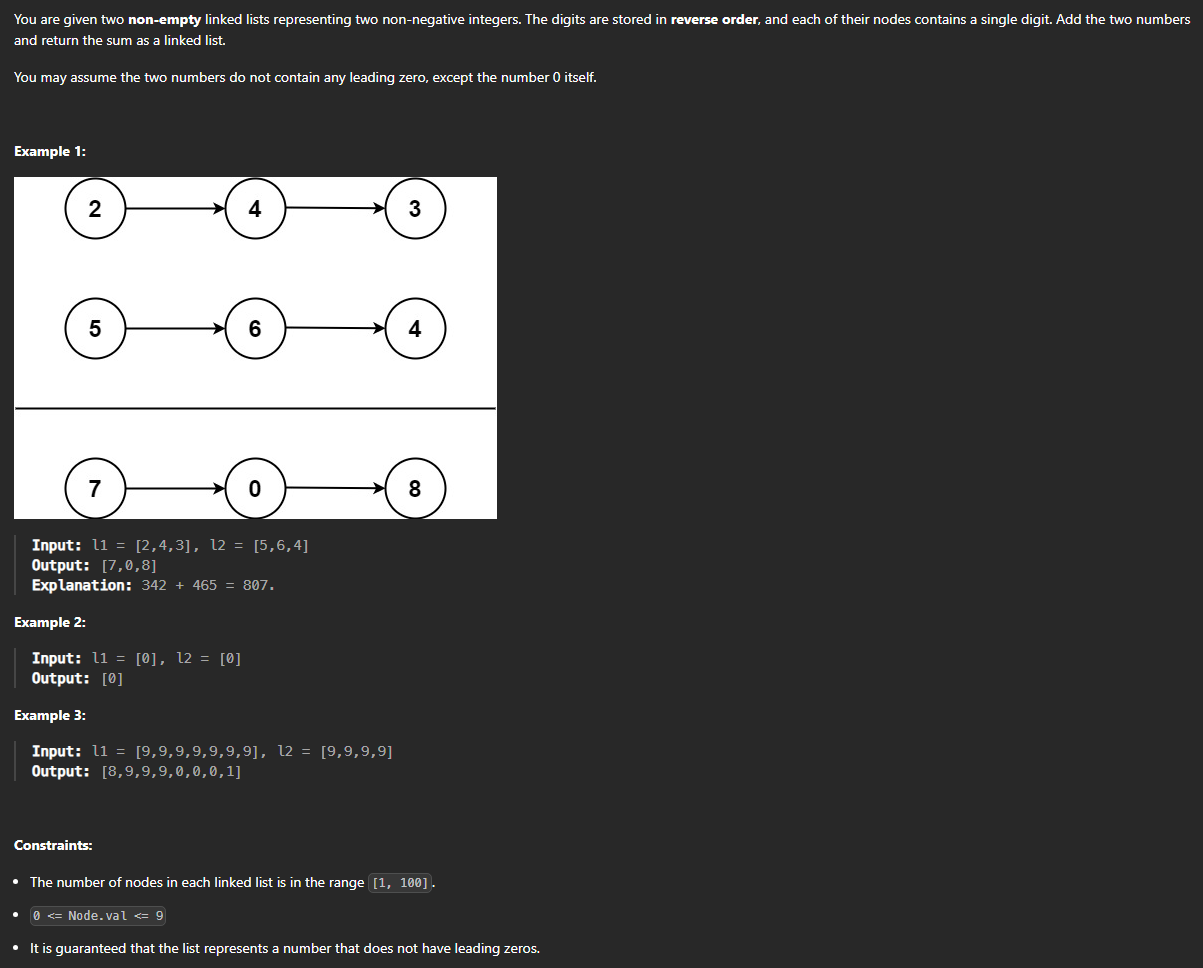

## Deconstruction of the Problem:

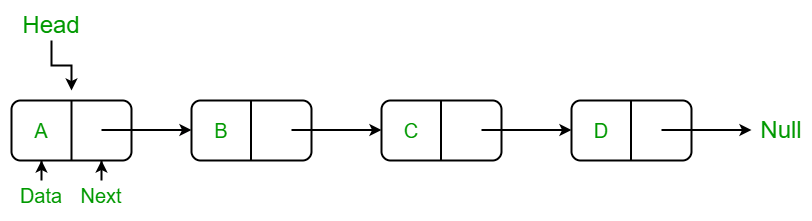
A linked list is a sequence of elements such that each element in the linked list points to the adjacent element in the sequence. Each element of the linked list is called a Node. A linked list is formed by connecting multiple nodes. A node consists of two parts: data  and pointer to another node. Data is the raw information that we want to maintain (can be video object, number). A pointer stores the link of the adjacent node. Only after reading the reference, we can know the location of the next sequential node. 

Essentially adding two numbers using elementary arithmetic. However, note that there is a couple of edge cases that we have to consider.

Edge Case 1: two linked lists are of different sizes
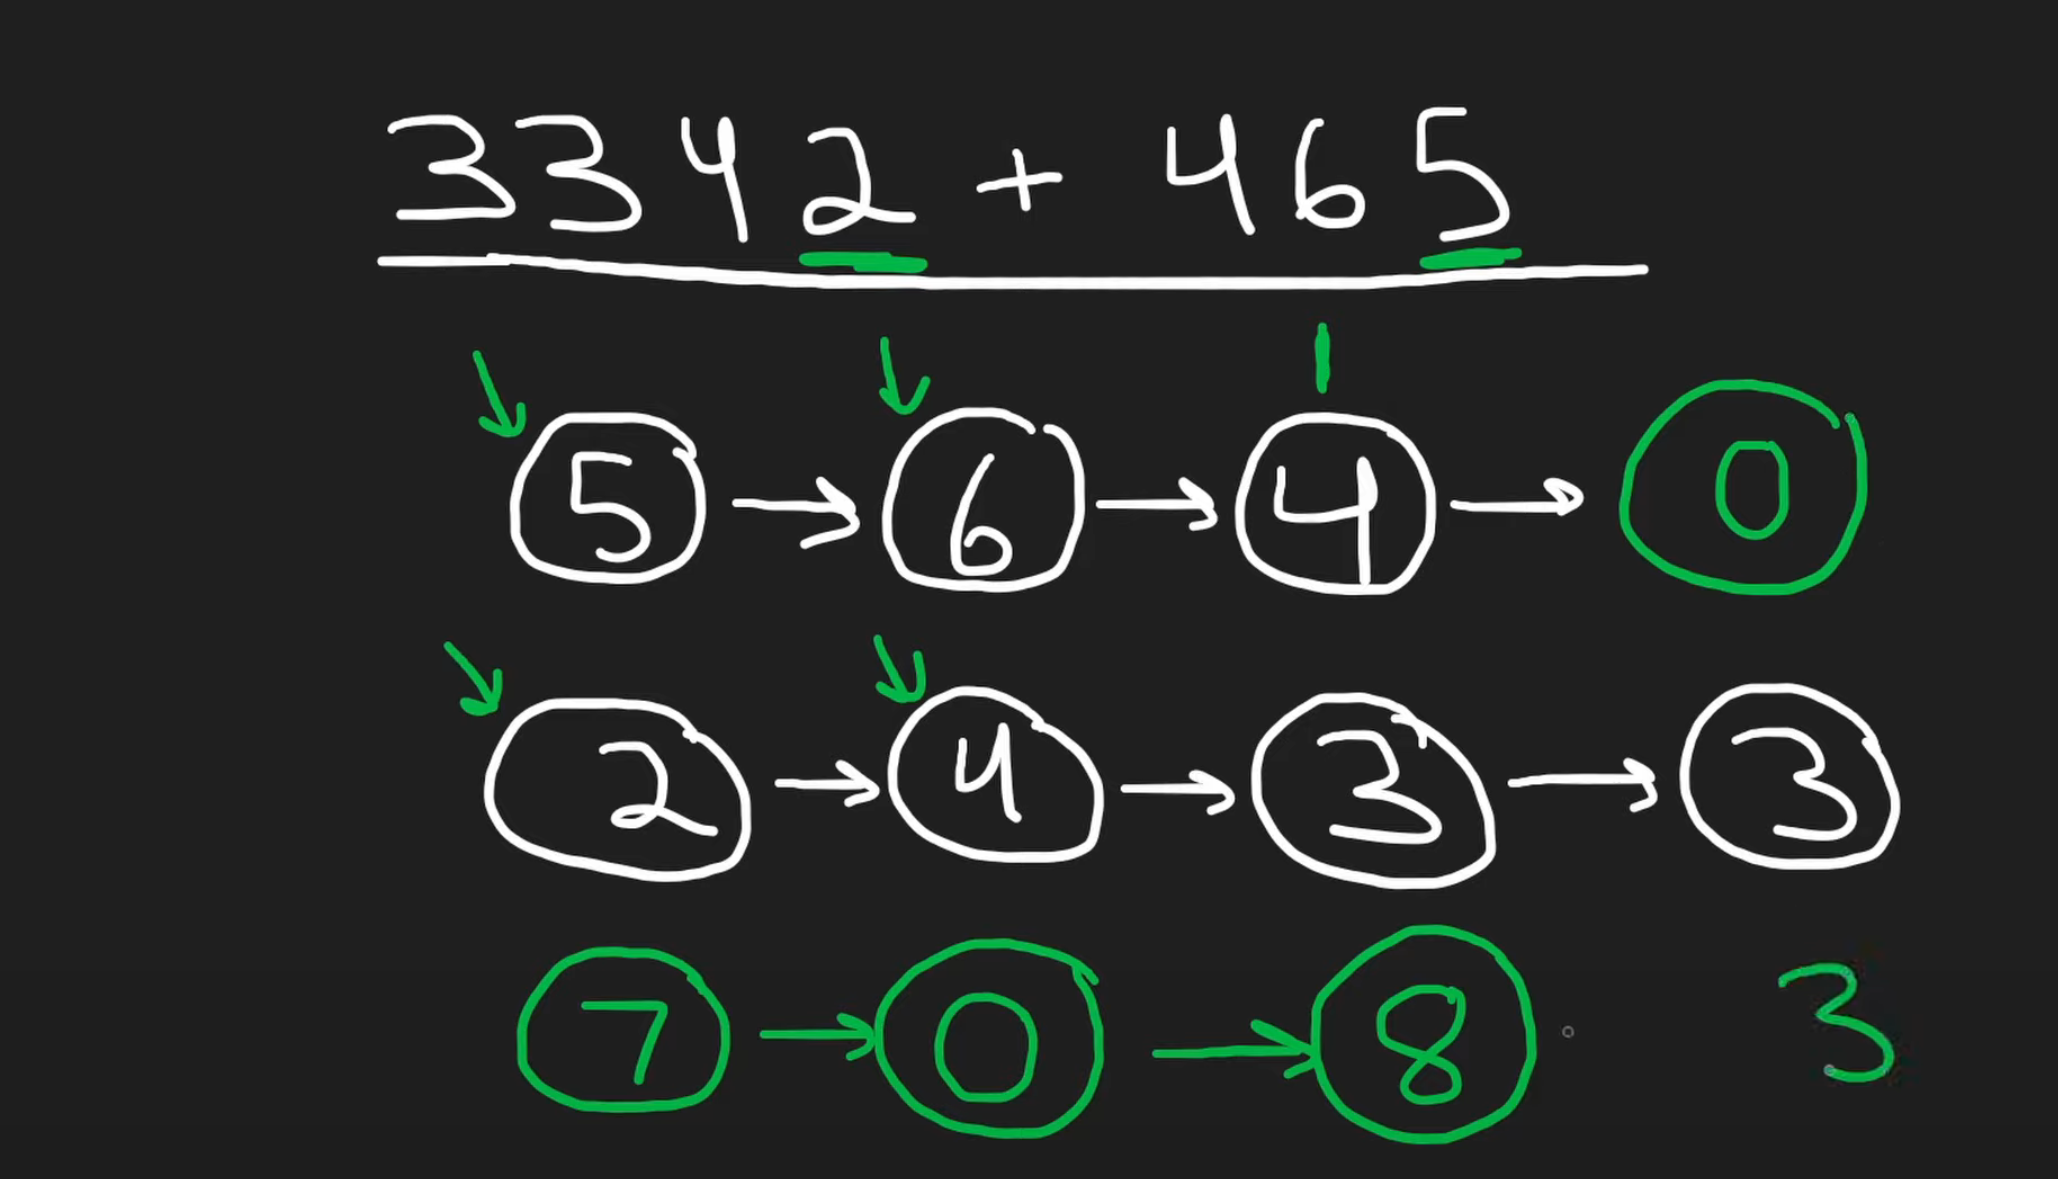

Straightforward, we just have to consider the case where the two linked lists are different sizes.

Edge Case 2: carry
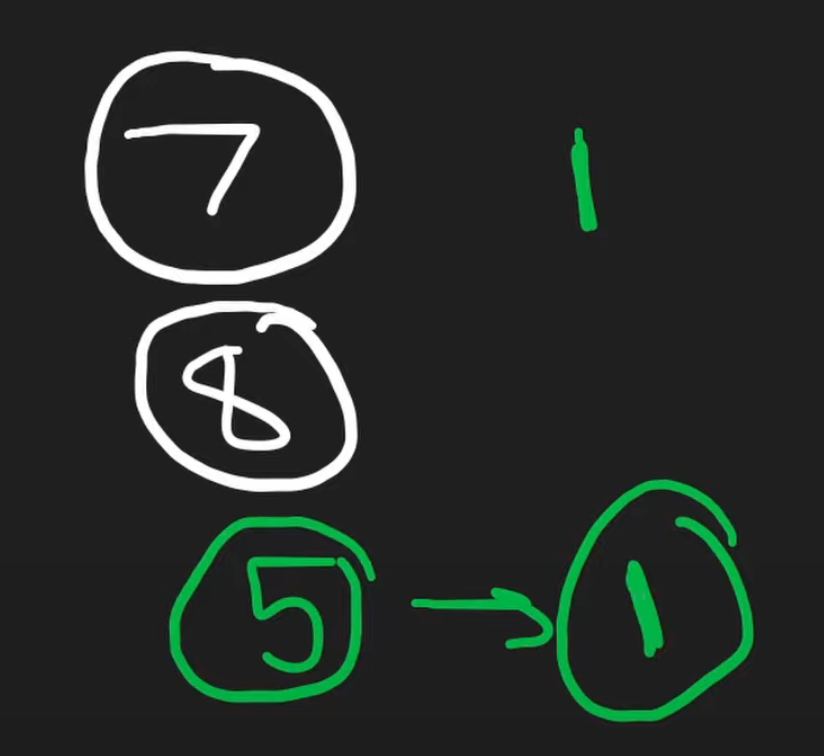

If there is a carry from our arithmetic calculation, we have to remember to put the carrry in our result even if there are null nodes as shown in the diagram above. 

## Code #1

In [21]:
# Definition for singly-linked list.
class ListNode:
     def __init__(self, val=0, next=None):
         self.val = val
         self.next = next

class Solution:
    def addTwoNumbers(self, l1:ListNode, l2:ListNode)->ListNode:
        # We are creating a resulting linked list:
        # So, we create a dummy node to not have to deal with edge cases of inserting into the linked list
        dummy = ListNode()
        # current pointer pointing at the position that we are going to be inserting a new node (new digit)
        current_pointer = dummy
        
        carry = 0
        # iterate while either one has a digit
        while l1 or l2 or carry:
            # let v1 = digit of list 1, only if l1 is non-null. If l1 is null, we will set it to 0
            # just like edge case 1. Same applies to v2.
            v1 = l1.val if l1 else 0
            v2 = l2.val if l2 else 0
            
            # new digit
            val = v1 + v2 + carry
            
            # but we could have potentially updated carry. Then we want to get carry out of that
            carry = val // 10
            # our value could be creater than 10, so we take the 1-th place digit (remainder)
            val = val % 10
            # Now we have our digit. Insert the new list node with the value we just computed
            current_pointer.next = ListNode(val)
        
            # update pointers
            current_pointer = current_pointer.next
            # update list 1 and list 2 pointers, if they are non-null
            l1 = l1.next if l1 else None
            l2 = l2.next if l2 else None
        
        # Now remember the edge case 2: say if we are dealing with 8+7, then the loop will
        # end forgeting about the carry. We have to take account of this carry to complete the code.
        # We can adjust this by adding one last condition in the very beginning of the loop:
        # "or carry" -> 8+7, v1 and v2 are null but our carry is non-null (1). So we will insert
        # val = 0 + 0 + 1 = 1. Only then we return the list we created.
        return dummy.next   
    

# Test Code

# Note that we are dealing with linked lists, not Python lists.
# We will need to build function to convert Python lists to linked lists using the ListNode class.
def create_linked_list(values):
    dummy = ListNode()
    current = dummy
    for value in values:
        current.next = ListNode(value)
        current = current.next
    return dummy.next

# Create linked lists for numbers 564 and 243
l1 = create_linked_list([5, 6, 4])  # Represents number 564
l2 = create_linked_list([2, 4, 3])  # Represents number 243

# Create an instance of the Solution class
my_solution = Solution()

# Call the addTwoNumbers method and print the result
result = my_solution.addTwoNumbers(l1, l2)

# Function to print the linked list
def print_linked_list(head):
    while head:
        print(head.val, end=" ")
        head = head.next
    print()

# Print the result
print_linked_list(result)  # Expected output: 7 0 8

7 0 8 
